# Basic Statistics Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
LoansData = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/LoansData.csv")
LoansData

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [3]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [4]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [5]:
# DATA PREP STEPS:

LoansData.columns = [col.replace('.','_') for col in LoansData.columns]

In [6]:
LoansData.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

In [7]:
LoansData.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [8]:
# Data Prep steps:

LoansData['Interest_Rate'] = LoansData.Interest_Rate.apply(lambda x : float(str(x).replace('%', '')))
LoansData['Loan_Length'] = LoansData.Loan_Length.apply(lambda x : float(str(x).replace('months', '')))
LoansData['Debt_To_Income_Ratio'] = LoansData.Debt_To_Income_Ratio.apply(lambda x : float(str(x).replace('%', '')))
LoansData['Employment_Length'] = LoansData.Employment_Length.apply(lambda x : float(str(x).replace(' years', '').replace(' year','').replace('< ','').replace('+','')))

LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   float64
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [9]:
LoansData['FICO_avg'] = (pd.to_numeric(LoansData.FICO_Range.str.split('-', expand = True)[0]) + 
                           pd.to_numeric(LoansData.FICO_Range.str.split('-', expand = True)[1])) / 2

In [10]:
LoansData.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
FICO_avg                           2
dtype: int64

In [11]:
# Treatment for Missing Values:

def missing_var(x):
    
    if (x.dtype == 'float') or (x.dtype == 'int'):
        x = x.fillna(x.median())
        
    elif (x.dtype == 'object') or (x.dtype == 'O'):
        x = x.fillna(x.mode()[0])
        
    else:
        x
        
    return x    

In [12]:
LoansData = LoansData.apply(missing_var)

In [13]:
LoansData.isnull().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
FICO_avg                          0
dtype: int64

## BUSINESS PROBLEM 1:

### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)


In [14]:
# H0 : Direct relationship
# Ha : Indirect Relationship (Less interest charged for high loan amounts)
# CI : 95%, p value: 0.05

#perform the test
stats.pearsonr(LoansData.Amount_Funded_By_Investors, LoansData.Interest_Rate)

# Business conlusion: Here p value is less than 0.05 so we reject H0. Hence interest rate is varried for diff. loan Amounts. 

PearsonRResult(statistic=0.3374589686089662, pvalue=1.2376653981362837e-67)

### b. Loan length is directly effecting intrest rate.

In [15]:
# H0 : Loan length is not effecting interest rate
# H1 : Loan length is directly effecting int. rate.
# CI : 95%, p value: 0.05

In [16]:
stats.pearsonr(LoansData.Interest_Rate, LoansData.Loan_Length)

PearsonRResult(statistic=0.42416737515954295, pvalue=9.605991607854548e-110)

In [17]:
# Business Conclusion: Here p value is extreamly low , meaning we reject H0, hence Loan length is directly effecting int. rate.

### c. Inrest rate varies for different purpose of loans


In [18]:
LoansData.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [19]:
m1 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'debt_consolidation']
m2 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'credit_card']
m3 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'other']
m4 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'home_improvement']
m5 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'major_purchase']
m6 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'small_business']
m7 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'car']
m8 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'wedding']
m9 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'medical']
m10 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'moving']
m11 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'vacation']
m12 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'house']
m13 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'educational']
m14 = LoansData.Interest_Rate.loc[LoansData.Loan_Purpose == 'renewable_energy']

In [20]:
# H0 : m1 = m2 = m3 = m4..........m13 = m14
# H1 : atleast one of the means different from other means.
# CI = 95%,  p value = 0.05

# perform the ANOVA test
stats.f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14)

F_onewayResult(statistic=7.482212567168054, pvalue=1.1627206793499994e-14)

In [21]:
# Business conclusion: Here p value is low so we reject H0, i.e there is effect of loan purpose on rate of interest. 

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.


In [22]:
LoansData.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_avg
0,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,717.0


In [23]:
LoansData.Home_Ownership.value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [24]:
H1 = LoansData.FICO_avg.loc[LoansData.Home_Ownership == 'MORTGAGE']
H2 = LoansData.FICO_avg.loc[LoansData.Home_Ownership == 'RENT']
H3 = LoansData.FICO_avg.loc[LoansData.Home_Ownership == 'OWN']
H4 = LoansData.FICO_avg.loc[LoansData.Home_Ownership == 'OTHER']
H5 = LoansData.FICO_avg.loc[LoansData.Home_Ownership == 'NONE']

In [25]:
# H0: H1 = H2 = H3 = H4  H5
# H1: H1 <> H2 <> H3 <> H4 <> H5

#PERFORM THE TEST

stats.f_oneway(H1, H2, H3, H4, H5)

F_onewayResult(statistic=19.345822938089942, pvalue=1.0902432079019346e-15)

In [26]:
# Business conlusion: Here p value is low so we reject H0, There is relationship between FICO scores and Home Ownership.

## BUSINESS PROBLEM - 2


In [27]:
Price_Quotes = pd.read_csv('C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Price_Quotes.csv')
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [28]:
# H0: Mary price Quotes = Bary price Quotes
# H1: Mary price Quotes <> Bary price Quotes
# CI: 95%

# Perform the test

stats.ttest_rel(a = Price_Quotes.Barry_Price, b = Price_Quotes.Mary_Price)

Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

In [29]:
#Business problem: Here p value is less than 0.05 so we reject H0, i.e average price quotes provided by Mary is differ from Barry.

## BUSINESS PROBLEM 3:

### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?


In [30]:
Treat_Fac = pd.read_csv('C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Treatment_Facility.csv')
Treat_Fac.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [31]:
Treat_Fac = Treat_Fac.rename(columns={'VAR4':'TRFF', 'VAR5':'CI'})

In [32]:
R1 = Treat_Fac.CI.loc[Treat_Fac.Reengineer == 'Prior']
R2 = Treat_Fac.CI.loc[Treat_Fac.Reengineer == 'Post']

In [33]:
# H0:  incident rates prior and post are not changed.
# H1:  incident rates prior and post are changed.
# CI: 95%
stats.ttest_ind(a = R1, b = R2, equal_var = False)


Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193204)

In [34]:
#Business Conclusion: Here p value is low so we reject H0, i.e critical incident rates(CI) prior and post are changed.

## BUSINESS PROBLEM 4:

In [35]:
Prior_ass = pd.read_csv('C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/Priority_Assessment.csv')
Prior_ass

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [36]:
H = Prior_ass.Days.loc[Prior_ass.Priority == 'High']
M = Prior_ass.Days.loc[Prior_ass.Priority == 'Medium']
L = Prior_ass.Days.loc[Prior_ass.Priority == 'Low']

In [37]:
print(H.mean())
print(M.mean())
print(L.mean())

3.023619631901845
2.5000000000000004
4.228358208955225


In [38]:
# H0: High is less quick to medium, medium is less quick to low
# H1: High is more quick to medium, medium is more quick to low
# CI: 95%

# perform the test

stats.f_oneway(H, M, L)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [39]:
# Business Conclusion: Here p value is high so we accept null hypothesis, i.e one of the three priority is less quick to its lower priority.

## BUSINESS PROBLEM 5:

In [40]:
Films = pd.read_csv('C:/Users//Sanjeet Gulia/Documents/Python_DATA_SETS/Films.csv')
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


#### DATA PREP

In [41]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [42]:
Films.Gender = np.where((Films.Gender == '1') | (Films.Gender == 'Male'), 'Male', 'Female')

In [43]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [44]:
Films.Marital_Status = np.where((Films.Marital_Status == '1') | (Films.Marital_Status == 'Married'), 'Married', 'Single')

In [45]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     0
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [46]:
def missing_var(x):
    
    if (x.dtype == 'float') or (x.dtype == 'object'):
        x = x.fillna(x.mode()[0])
        
    else:
        x
    return x    

In [47]:
Films = Films.apply(missing_var)

In [48]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

###  What isthe overall level of customer satisfaction?

In [49]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [50]:
mean = Films.Overall.mean()
mean

1.621212121212121

In [51]:
std = Films.Overall.std()
std

0.6878262202585181

In [52]:
SE = std/ (np.sqrt(Films.shape[0]))
SE

0.037863587260422576

In [53]:
print('overall level of customer satisfaction is ', (mean-(1.96*SE)), 'to', (mean+(1.96*SE))) 

overall level of customer satisfaction is  1.5469994901816928 to 1.6954247522425494


###  What factors are linked to satisfaction?

In [55]:
Films.head(1)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5


In [56]:
# H0: Factors are not linked to satisfaction.
# H1: Factors are linked to satisfaction.
# CI: 95%

In [57]:
# Factor 1: Movie
Films.Movie.value_counts()     

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [58]:
M1 = Films.Overall.loc[Films.Movie == 'Willy Wonka']
M2 = Films.Overall.loc[Films.Movie == 'Ferris Buellers Day Off']
M3 = Films.Overall.loc[Films.Movie == 'Old School']

In [59]:
# perform the test
stats.f_oneway(M1, M2, M3)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

In [60]:
# Here p value is high so we accept H0,i.e Movie factor is not linked to satisfaction.

In [61]:
# Factor 2: Gender
Films.Gender.value_counts()

Female    213
Male      117
Name: Gender, dtype: int64

In [62]:
F = Films.Overall.loc[Films.Gender == 'Female']
M = Films.Overall.loc[Films.Gender == 'Male']

In [66]:
# perform the test
stats.f_oneway(F, M)

Ttest_indResult(statistic=-1.393621669674226, pvalue=0.16437541932112798)

In [64]:
# Here p value is high so we accept H0,i.e Gender factor is not linked to satisfaction.

In [65]:
# Factor 3: Marital_Status
Films.Marital_Status.value_counts()

Single     230
Married    100
Name: Marital_Status, dtype: int64

In [67]:
S = Films.Overall.loc[Films.Marital_Status == 'Single']
M = Films.Overall.loc[Films.Marital_Status == 'Married']

In [72]:
# perform the test
stats.ttest_ind(S, M) 

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

In [73]:
# Here p value is high so we accept H0,i.e Marital_Status factor is not linked to satisfaction.

In [76]:
# Factor 4: Sinage
Films.Sinage.value_counts()

2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: Sinage, dtype: int64

In [77]:
stats.pearsonr(Films.Sinage, Films.Overall)

PearsonRResult(statistic=0.38210280422395665, pvalue=6.501065434766499e-13)

In [78]:
# Here p value is low so we reject H0,i.e Sinage factor is linked to satisfaction.

In [79]:
# Factor 5: Parking
Films.Parking.value_counts()

2.0    155
1.0    135
3.0     29
4.0      7
5.0      4
Name: Parking, dtype: int64

In [80]:
stats.pearsonr(Films.Parking, Films.Overall)

PearsonRResult(statistic=0.5144289487855273, pvalue=1.0840276087789278e-23)

In [81]:
# Here p value is low so we reject H0,i.e Parking factor is linked to satisfaction.

In [82]:
# Factor 6: Clean
Films.Clean.value_counts()

2.0    155
1.0    144
3.0     24
4.0      5
5.0      2
Name: Clean, dtype: int64

In [83]:
stats.pearsonr(Films.Clean, Films.Overall)

PearsonRResult(statistic=0.3508222789070923, pvalue=5.437550007439627e-11)

In [84]:
# Here p value is low so we reject H0,i.e Clean factor is linked to satisfaction.

In [85]:
# Factor 7: Age
Films.Age.value_counts()

2.0    177
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [93]:
A1 = Films.Overall.loc[Films.Age == 1]
A2 = Films.Overall.loc[Films.Age == 2]
A3 = Films.Overall.loc[Films.Age == 3]
A4 = Films.Overall.loc[Films.Age == 4]

In [94]:
stats.f_oneway(A1, A2, A3, A4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [87]:
# Here p value is High so we accept H0,i.e Age factor is not linked to satisfaction.

In [88]:
# factor 8: Income
Films.Income.value_counts()

1.0    158
3.0     90
2.0     82
Name: Income, dtype: int64

In [95]:
I1 = Films.Overall.loc[Films.Income == 1]
I2 = Films.Overall.loc[Films.Income == 2]
I3 = Films.Overall.loc[Films.Income == 3]

In [96]:
stats.f_oneway(I1, I2, I3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

In [90]:
# Here p value is High so we accept H0,i.e Income factor is not linked to satisfaction.

In [97]:
# Factor 9: Hear_About
Films.Hear_About.value_counts()

5      233
4       41
1       22
3       14
2       12
2,5      2
3,4      2
4,5      1
1,5      1
5,4      1
3,5      1
Name: Hear_About, dtype: int64

In [98]:
HA1  = Films.Overall.loc[Films.Hear_About == '5']
HA2  = Films.Overall.loc[Films.Hear_About == '4']
HA3  = Films.Overall.loc[Films.Hear_About == '1']
HA4  = Films.Overall.loc[Films.Hear_About == '3']
HA5  = Films.Overall.loc[Films.Hear_About == '2']
HA6  = Films.Overall.loc[Films.Hear_About == '2,5']
HA7  = Films.Overall.loc[Films.Hear_About == '3,4']
HA8  = Films.Overall.loc[Films.Hear_About == '4,5']
HA9  = Films.Overall.loc[Films.Hear_About == '1,5']
HA10 = Films.Overall.loc[Films.Hear_About == '5,4']
HA11 = Films.Overall.loc[Films.Hear_About == '3,5']

In [99]:
stats.f_oneway(HA1, HA2, HA3, HA4, HA5, HA6, HA7, HA8, HA9, HA10, HA11)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883888)

In [100]:
# Here p value is High so we accept H0,i.e Hear_About factor is not linked to satisfaction.

##### Business conclusion: After perform tests on all factor we found that there is only 3 Factors(SINAGE, PARKING, CLEAN) linked to satisfaction this data.

###  What is the demographic profile of Film on the Rocks patrons?

In [120]:
Films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [116]:
gen = ((Films.Gender.value_counts() / Films.shape[0]) * 100).reset_index().set_index('index')

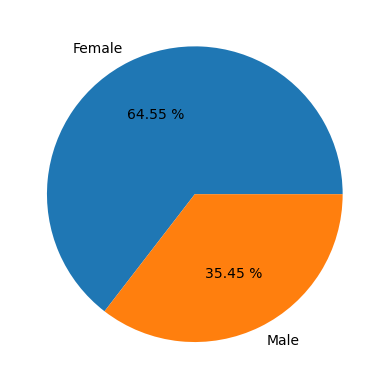

In [119]:
plt.pie(gen.Gender, labels = gen.index, autopct = '%0.2f %%')
plt.show()

In [124]:
Ms = ((Films.Marital_Status.value_counts()) / Films.shape[0] * 100).reset_index().set_index('index')
Ms

,Marital_Status
index,
Single,69.69697
Married,30.30303


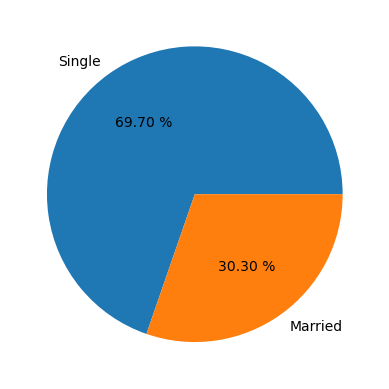

In [125]:
plt.pie(Ms.Marital_Status, labels = Ms.index, autopct = '%0.2f %%')
plt.show()

In [126]:
Ag = ((Films.Age.value_counts()) / Films.shape[0] * 100).reset_index().set_index('index')
Ag

,Age
index,
2.0,53.636364
3.0,35.454545
1.0,7.878788
4.0,3.030303


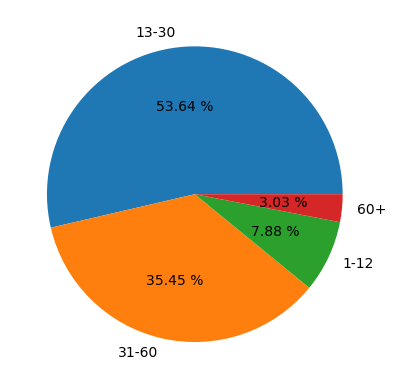

In [132]:
plt.pie(Ag.Age, labels = ['13-30','31-60','1-12','60+'], autopct = '%0.2f %%')
plt.show()

In [128]:
I = ((Films.Income.value_counts()) / Films.shape[0] * 100).reset_index().set_index('index')
I

,Income
index,
1.0,47.878788
3.0,27.272727
2.0,24.848485


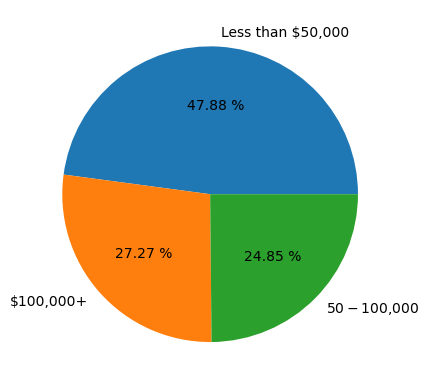

In [131]:
plt.pie(I.Income, labels = ['Less than $50,000','$100,000+','$50-$100,000'], autopct = '%0.2f %%')
plt.show()

###  In what media outlet(s) should the film series be advertised?

In [138]:
Films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'

In [ ]:
# '5' means 'Word of mouth' by which the film series should be advertised.